### Generating Training Dataset

In [1]:
import numpy as np

def F(x1, x2):
    return np.sin(np.pi * x1 / 2.0) * np.cos(np.pi * x2 / 4.0) 

A = 2

nb_samples = 1000
X_train = np.random.uniform(-A, A, (nb_samples, 2))
y_train = np.vectorize(F)(X_train[:, 0], X_train[:, 1])

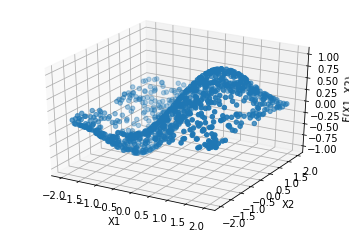

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker='o')

n = 100

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('F(X1, X2)')

plt.show()

### Models

In [4]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


#### The network

In [5]:
from keras.layers import Dense, Activation
nb_units = 20
model.add(Dense(nb_units, input_shape=(2, )))
#model.add(Dense(nb_units, input_shape=(2, ), activation='relu'))
model.add(Activation('relu'))
model.add(Dense(1))

#### The optimization method

In [6]:
from keras.optimizers import SGD
sgd = SGD(lr=.01,
         decay=1e-6,
         momentum=.9,
         nesterov=True)

In [7]:
model.compile(loss='mean_squared_error', optimizer=sgd)

#### Running the optimization

In [9]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 27us/step - loss: 0.0343
Epoch 2/10
1000/1000 [==============================] - 0s 23us/step - loss: 0.0273
Epoch 3/10
1000/1000 [==============================] - 0s 18us/step - loss: 0.0218
Epoch 4/10
1000/1000 [==============================] - 0s 16us/step - loss: 0.0175
Epoch 5/10
1000/1000 [==============================] - 0s 17us/step - loss: 0.0140
Epoch 6/10
1000/1000 [==============================] - 0s 18us/step - loss: 0.0112
Epoch 7/10
1000/1000 [==============================] - 0s 18us/step - loss: 0.0092
Epoch 8/10
1000/1000 [==============================] - 0s 18us/step - loss: 0.0075
Epoch 9/10
1000/1000 [==============================] - 0s 18us/step - loss: 0.0064
Epoch 10/10
1000/1000 [==============================] - 0s 19us/step - loss: 0.0054


### Prediction

In [10]:
x = [1.5, 0.5] 
print(F(x[0], x[1]))

x = np.array(x).reshape(1, 2) 
print(x)
print(model.predict(x)) 
print(model.predict(x)[0][0])

0.6532814824381883
[[1.5 0.5]]
[[0.5555065]]
0.5555065


In [12]:
y_pred = model.predict(X_train)#np.vectorize(F)(X_train[:, 0], X_train[:, 1])

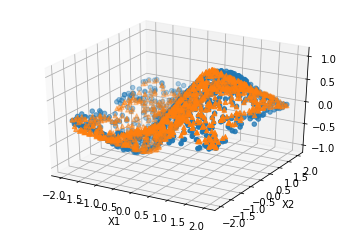

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker='o')
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, marker='^')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
#ax.set_zlabel('F(X1, X2)')

plt.show()